In [1]:
# Librerias generales
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Lectura de base de datos
df = pd.read_csv('DBs\df_sel.csv')
y = pd.read_csv('DBs\y.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
y.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df

,servicio_habilitado,via_ingreso,unidad_estrategica,transfusion_sangre,antibiotico,dx_principal_egreso_capitulo,profesional_especialidad_grd,clasificacion_imc,control_diabetes,tiene_hta,...,frecuencia_cardiaca_en_reposo,vo2_-_maxima_cantidad_de_oxigeno,lipoproteina,trigliceridos,creatinina_1_consulta,tasa_de_filtracion_glomerular_tfg,hormona_estimulante_de_la_tiroides_(tsh),creatinina_2_consulta,numero_diagnosticos,edad
0,0.666667,0.5,0.333333,0.0,0.0,0.0625,0.586207,0.666667,1.000000,1.0,...,0.192661,0.187535,0.375595,0.068970,0.073067,0.214658,0.141486,0.065060,0.083333,0.765432
1,0.666667,0.5,0.333333,0.0,0.0,0.0625,0.586207,1.000000,0.000000,0.0,...,0.275229,0.147795,0.522063,0.000000,0.000000,0.000000,0.045503,0.099598,0.027778,0.864198
2,0.666667,1.0,0.333333,0.0,0.0,0.3750,0.586207,0.333333,1.000000,1.0,...,0.614679,0.209841,0.242063,0.088553,0.051827,0.213859,0.000000,0.000000,0.000000,0.777778
3,0.666667,1.0,0.333333,0.0,0.0,0.4375,0.068966,1.000000,1.000000,1.0,...,0.211009,0.205458,0.000000,0.085817,0.072218,0.206353,0.005332,0.106024,0.000000,0.802469
4,0.666667,1.0,0.333333,0.0,1.0,0.5000,0.482759,0.666667,0.333333,1.0,...,0.412844,0.627775,0.000000,0.108495,0.068819,0.525542,0.699253,0.062651,0.000000,0.283951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,0.666667,1.0,0.333333,0.0,1.0,0.4375,0.068966,0.333333,0.666667,1.0,...,0.724771,0.230517,0.533770,0.320374,0.050127,0.274256,0.000000,0.069880,0.055556,0.666667
1469,1.000000,1.0,1.000000,0.0,0.0,0.9375,0.655172,0.333333,0.333333,1.0,...,0.532110,0.410321,0.000000,0.050468,0.095157,0.146615,0.076431,0.094779,0.000000,0.827160
1470,0.666667,1.0,0.333333,0.0,0.0,0.7500,0.241379,0.666667,0.000000,1.0,...,0.192661,0.404256,0.000000,0.000000,0.000000,0.000000,0.000000,0.061847,0.000000,0.679012
1471,0.666667,1.0,0.333333,0.0,0.0,0.3750,0.586207,0.000000,0.333333,1.0,...,0.165138,0.506070,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.950617


In [4]:
y

,tiempo_estancia
0,77.719108
1,302.528029
2,168.615411
3,90.240822
4,245.486805
...,...
1468,133.301420
1469,23.346871
1470,62.268748
1471,91.969748


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Crear una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el escalador a los datos
scaler.fit(y)

# Transformar los datos y almacenarlos en una nueva variable
y_sc = scaler.transform(y)

y_sc= pd.DataFrame(y_sc, columns=y.columns)

# <h1> Elección de modelos mediante CrossValidation

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.linear_model import LinearRegression

In [7]:
#Creacion modelo Regresión lineal
#m_lr = LinearRegression()

#Creacion modelo Gradient Boosting Regression
m_gbr = ensemble.GradientBoostingRegressor()

#Creacion modelo Decision Tree Regression
m_dtr = DecisionTreeRegressor()

#Creacion modelo Support Vector Machine Regression
m_svr=SVR()

#Creacion modelo Random Forest Regression
m_rfr=RandomForestRegressor()

#Creacion modelo LightGBM
m_lgb=lgb.LGBMRegressor()

#lista de modelos
m=([ m_gbr, m_dtr,m_svr,m_rfr,m_lgb])

In [8]:
def medir_modelos(modelos, scoring, X, y, cv):
    metric_modelos = pd.DataFrame()
    for i, modelo in enumerate(modelos):
        scores = cross_val_score(modelo, X, y, scoring=scoring, cv=cv)
        col_name = f'm{i + 1}_{modelo.__class__.__name__}'  # Nombre de columna con número de modelo y nombre del modelo
        pdscores = pd.DataFrame(scores, columns=[col_name])
        metric_modelos = pd.concat([metric_modelos, pdscores], axis=1)
    return metric_modelos


rmse1 = medir_modelos(m, 'neg_mean_squared_error', df, y_sc, 4)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A colu

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2017
[LightGBM] [Info] Number of data points in the train set: 1104, number of used features: 38
[LightGBM] [Info] Start training from score 0.075004
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000634 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2011
[LightGBM] [Info] Number of data points in the train set: 1105, number of used features: 38
[LightGBM] [Info] Start training from score 0.077257
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2025
[LightGBM] [Info] Number of data points in the train set: 

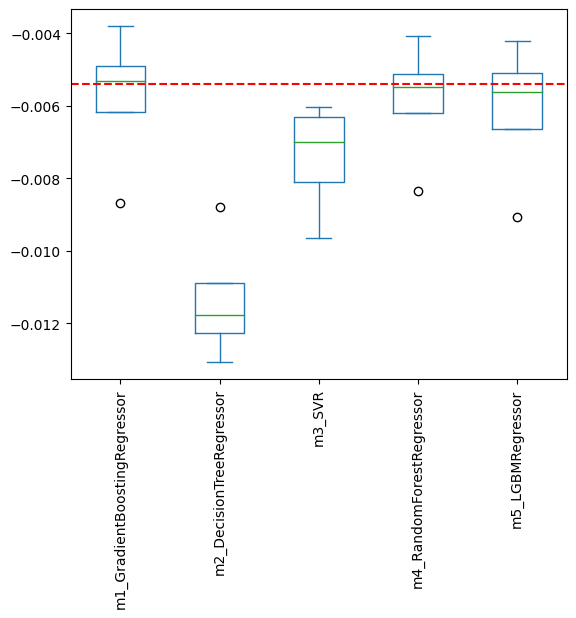

In [9]:
# Crear el gráfico de caja
ax = rmse1.plot(kind='box')
ax.axhline(y=-0.0054, color='r', linestyle='--')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Mostrar el gráfico
plt.show()

El modelo Gradient Boosting Regression, es el mejor de acuerdo con la inversa del rmse, ya que tiene una materica con su media más cercana a cero y menos negativa que los demas modelos. Lo que significa que el random forest regressor tiene un error cuadrático medio más bajo y, por lo tanto, sus predicciones están más cerca de los valores reales.

# <h1> Prueba de modelos para ver sus métricas en testeo

In [10]:
#separacion de datos
X_train,X_test,y_train,y_test=train_test_split(df,y_sc,test_size=0.3,random_state=0)

# <h1> LGBMRegressor

In [11]:
#Creacion modelo RandomForest
m_lgb=lgb.LGBMRegressor()
m_lgb.fit(X_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1987
[LightGBM] [Info] Number of data points in the train set: 1031, number of used features: 38
[LightGBM] [Info] Start training from score 0.077898


LGBMRegressor()

In [12]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar tu modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_lgb.predict(X_train).ravel()

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_lgb.predict(X_test).ravel()

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train_o = scaler.inverse_transform(y_pred_train.reshape(-1, 1))

y_test_o = scaler.inverse_transform(y_test)
y_pred_test_o = scaler.inverse_transform(y_pred_test.reshape(-1, 1))

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 32.2177789943067
Train - RMSE: 54.692319242069
Test - MAE: 113.72687577868157
Test - RMSE: 177.7398033121072


# <h1> GradientBoostingRegressor

In [13]:
m_gbr = ensemble.GradientBoostingRegressor()
m_gbr.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_gbr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_gbr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 76.85376050825548
Train - RMSE: 112.90269542764136
Test - MAE: 105.39340098133269
Test - RMSE: 162.06093218408364


# <h1> DecisionTreeRegressor

In [15]:
m_dtr = DecisionTreeRegressor()
m_dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [16]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_dtr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_dtr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 0.17539016246362762
Train - RMSE: 3.3650975847220304
Test - MAE: 139.30429305398442
Test - RMSE: 217.06835457978195


# <h1> SVR

In [17]:
m_svr=SVR()
m_svr.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [18]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_svr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_svr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 136.72786753416187
Train - RMSE: 161.21065699345385
Test - MAE: 153.23973007820848
Test - RMSE: 202.1440223767346


# <h1> RandomForestRegressor

In [19]:
m_rfr=RandomForestRegressor()
m_rfr.fit(X_train,y_train)

c:\Users\Dell\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [20]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ajuste de modelo y conjuntos de datos de entrenamiento y prueba
# X_train, X_test, y_train, y_test representan tus datos

# Entrenar modelo con X_train y y_train

# Realizar predicciones en el conjunto de entrenamiento
y_pred_train = m_rfr.predict(X_train)

# Realizar predicciones en el conjunto de prueba
y_pred_test = m_rfr.predict(X_test)

# Desescalar los valores predichos y los valores reales tanto para entrenamiento como para prueba
y_train_o = scaler.inverse_transform(y_train)
y_pred_train = y_pred_train.reshape(-1, 1)
y_pred_train_o = scaler.inverse_transform(y_pred_train)

y_test_o = scaler.inverse_transform(y_test)
y_pred_test = y_pred_test.reshape(-1, 1)
y_pred_test_o = scaler.inverse_transform(y_pred_test)

# Calcular métricas R^2, MAE y RMSE para el conjunto de entrenamiento
r2_train = r2_score(y_train_o, y_pred_train_o)
mae_train = mean_absolute_error(y_train_o, y_pred_train_o)
rmse_train = np.sqrt(mean_squared_error(y_train_o, y_pred_train_o))

# Calcular métricas R^2, MAE y RMSE para el conjunto de prueba
r2_test = r2_score(y_test_o, y_pred_test_o)
mae_test = mean_absolute_error(y_test_o, y_pred_test_o)
rmse_test = np.sqrt(mean_squared_error(y_test_o, y_pred_test_o))

# Imprimir los resultados para el conjunto de entrenamiento

print("Train - MAE:", mae_train)
print("Train - RMSE:", rmse_train)


# Imprimir los resultados para el conjunto de prueba

print("Test - MAE:", mae_test)
print("Test - RMSE:", rmse_test)

Train - MAE: 41.40051419043501
Train - RMSE: 65.25063160791073
Test - MAE: 108.27293757055935
Test - RMSE: 166.17475133227347
